<a href="https://colab.research.google.com/github/dattali18/machine_learning_msc_course/blob/main/test_prep/ML_test_prep_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# CELL 1: SETUP
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_blobs, make_moons

# Make the plots look nice
plt.style.use('seaborn-v0_8-whitegrid')
print("Setup complete! You can now run the visualization cells below.")

Setup complete! You can now run the visualization cells below.


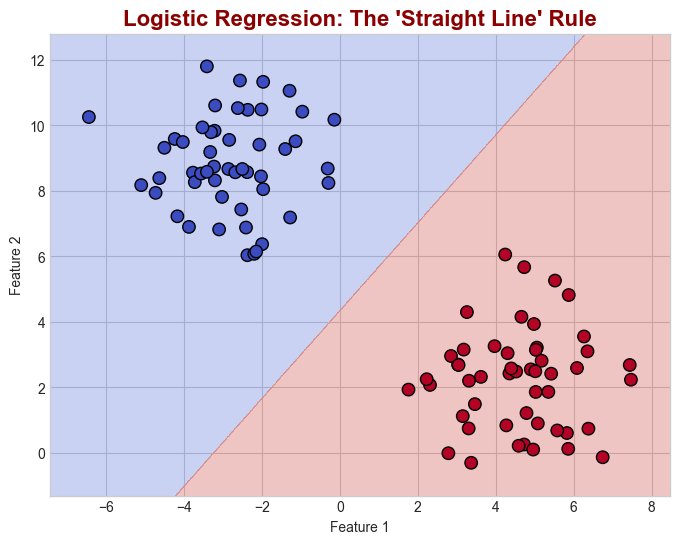

In [3]:
# CELL 2: LOGISTIC REGRESSION BOUNDARY
# Generate 2 blobs of data
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)

# Fit the model
model = LogisticRegression()
model.fit(X, y)

# Create the plot
plt.figure(figsize=(8, 6))

# Create meshgrid for background color
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 1000),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 1000))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot boundary and points
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=80)
plt.title("Logistic Regression: The 'Straight Line' Rule", fontsize=16, color='darkred', fontweight='bold')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

/var/folders/rn/1nw_2xns2sd3snlx7_6tk_h80000gn/T/ipykernel_20220/3603035932.py:16: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z_low, levels=[0.5], colors='blue', linewidths=3, label='Low Gamma')
/var/folders/rn/1nw_2xns2sd3snlx7_6tk_h80000gn/T/ipykernel_20220/3603035932.py:20: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z_high, levels=[0.5], colors='red', linewidths=2, linestyles='dashed', label='High Gamma')


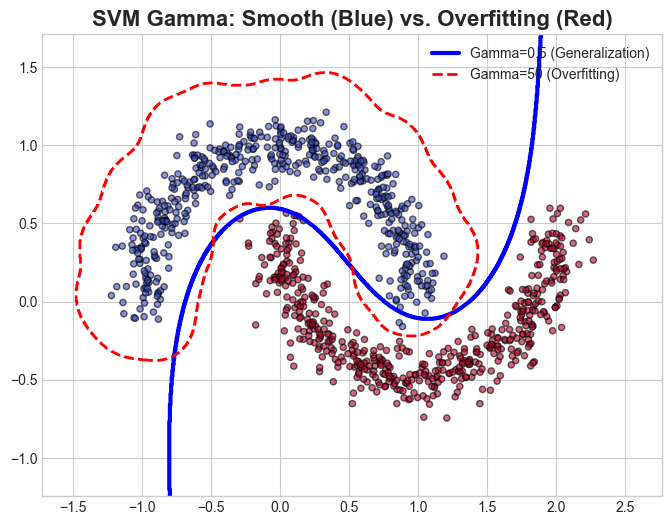

In [19]:
# CELL 3: SVM GAMMA (Reach)
# Generate moon-shaped data
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Fit models
model_low = SVC(kernel='rbf', gamma=0.5).fit(X, y)   # Low Gamma (Smooth)
model_high = SVC(kernel='rbf', gamma=50).fit(X, y)   # High Gamma (Overfit)

# Create plot
plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 1000),
                     np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 1000))

# Plot Low Gamma (Blue)
Z_low = model_low.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contour(xx, yy, Z_low, levels=[0.5], colors='blue', linewidths=3, label='Low Gamma')

# Plot High Gamma (Red)
Z_high = model_high.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contour(xx, yy, Z_high, levels=[0.5], colors='red', linewidths=2, linestyles='dashed', label='High Gamma')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=20, alpha=0.6)
plt.title("SVM Gamma: Smooth (Blue) vs. Overfitting (Red)", fontsize=16, fontweight='bold')
# Fake legend for contours
plt.plot([], [], color='blue', linewidth=3, label='Gamma=0.5 (Generalization)')
plt.plot([], [], color='red', linestyle='--', linewidth=2, label='Gamma=50 (Overfitting)')
plt.legend()
plt.show()

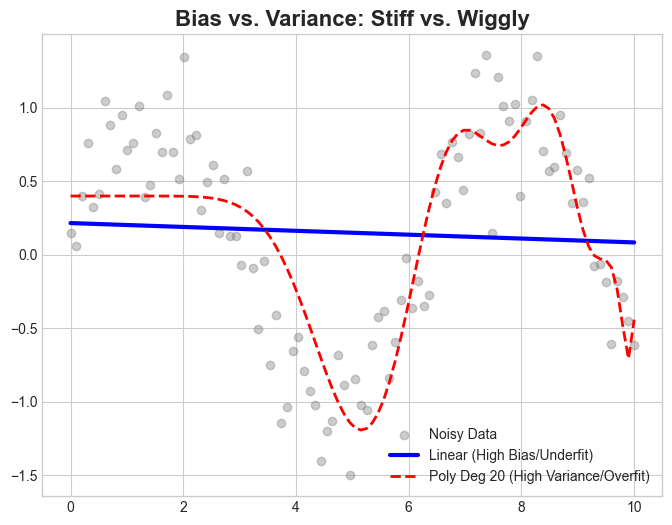

In [5]:
# CELL 4: BIAS VS VARIANCE
# Generate a sine wave with noise
np.random.seed(42)
X_line = np.linspace(0, 10, 100)
y_line = np.sin(X_line) + np.random.normal(0, 0.3, 100)
X_train = X_line[:, np.newaxis]

# High Bias Model (Linear Regression)
bias_model = LinearRegression().fit(X_train, y_line)
y_bias = bias_model.predict(X_train)

# High Variance Model (Degree 20 Polynomial)
var_model = make_pipeline(PolynomialFeatures(degree=20), LinearRegression())
var_model.fit(X_train, y_line)
y_var = var_model.predict(X_train)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_line, y_line, color='gray', alpha=0.4, label='Noisy Data')
plt.plot(X_line, y_bias, color='blue', linewidth=3, label='Linear (High Bias/Underfit)')
plt.plot(X_line, y_var, color='red', linewidth=2, linestyle='--', label='Poly Deg 20 (High Variance/Overfit)')

plt.title("Bias vs. Variance: Stiff vs. Wiggly", fontsize=16, fontweight='bold')
plt.legend()
plt.show()

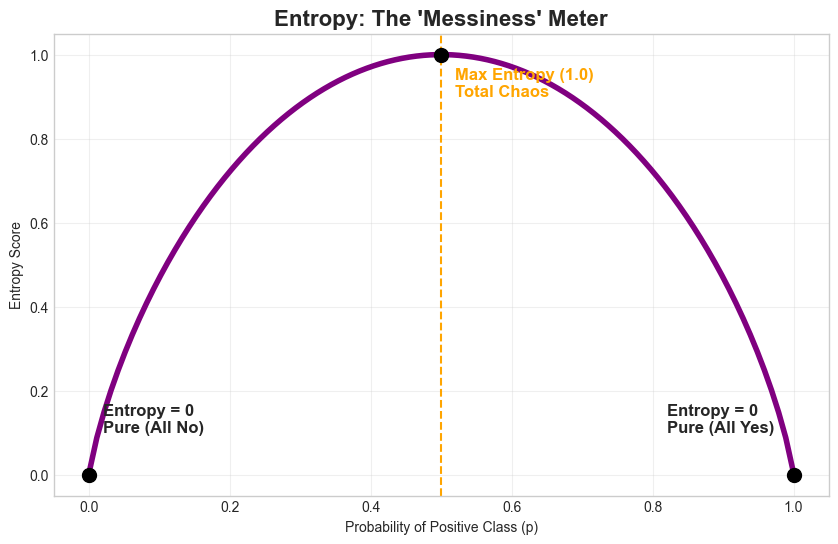

In [30]:
# CELL 5: ENTROPY CURVE
probs = np.linspace(0.001, 0.999, 100)
# Formula: -p*log(p) - (1-p)*log(1-p)
entropy = -probs * np.log2(probs) - (1 - probs) * np.log2(1 - probs)

plt.figure(figsize=(10, 6))
plt.plot(probs, entropy, color='purple', linewidth=4)

# Markers
plt.axvline(x=0.5, color='orange', linestyle='--')
plt.scatter([0, 0.5, 1], [0, 1, 0], color='black', s=100, zorder=5)

# Labels
plt.text(0.52, 0.9, 'Max Entropy (1.0)\nTotal Chaos', fontsize=12, color='orange', fontweight='bold')
plt.text(0.02, 0.1, 'Entropy = 0\nPure (All No)', fontsize=12, fontweight='bold')
plt.text(0.82, 0.1, 'Entropy = 0\nPure (All Yes)', fontsize=12, fontweight='bold')

plt.title("Entropy: The 'Messiness' Meter", fontsize=16, fontweight='bold')
plt.xlabel("Probability of Positive Class (p)")
plt.ylabel("Entropy Score")
plt.grid(True, alpha=0.3)
plt.show()

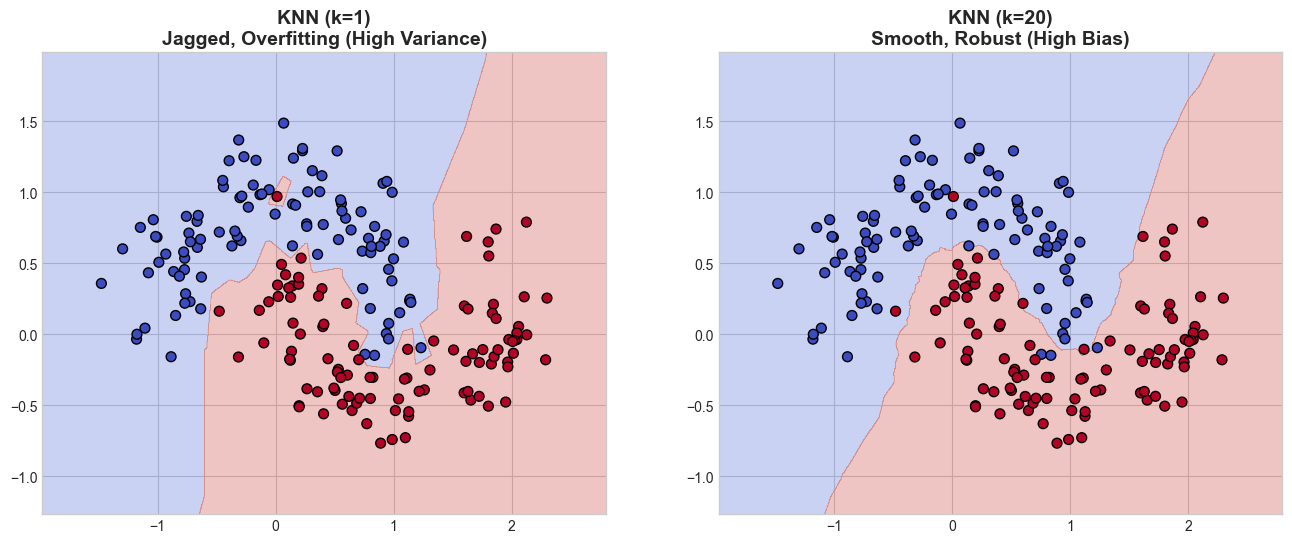

In [28]:
# CELL 6: KNN (k=1 vs k=20)
from sklearn.neighbors import KNeighborsClassifier

# Generate Data
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Fit Models
knn_1 = KNeighborsClassifier(n_neighbors=1).fit(X, y)
knn_20 = KNeighborsClassifier(n_neighbors=20).fit(X, y)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Helper to plot
def plot_boundary(ax, model, title):
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 1000),
                         np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 1000))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=50)
    ax.set_title(title, fontsize=14, fontweight='bold')

plot_boundary(axes[0], knn_1, "KNN (k=1)\nJagged, Overfitting (High Variance)")
plot_boundary(axes[1], knn_20, "KNN (k=20)\nSmooth, Robust (High Bias)")
plt.show()

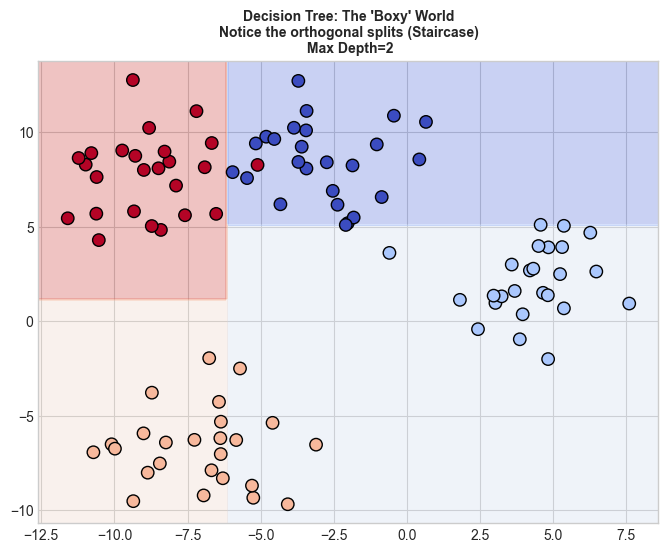

In [31]:
# CELL 7: DECISION TREE BOUNDARY
from sklearn.tree import DecisionTreeRegressor

# Generate Data
X, y = make_blobs(n_samples=100, centers=4, random_state=42, cluster_std=2.0)

# Fit Model
tree_clf = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_clf.fit(X, y)

# Plot
plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 200),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 200))
Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=80)
plt.title("Decision Tree: The 'Boxy' World\nNotice the orthogonal splits (Staircase)\n Max Depth=2", fontsize=10, fontweight='bold')
plt.show()

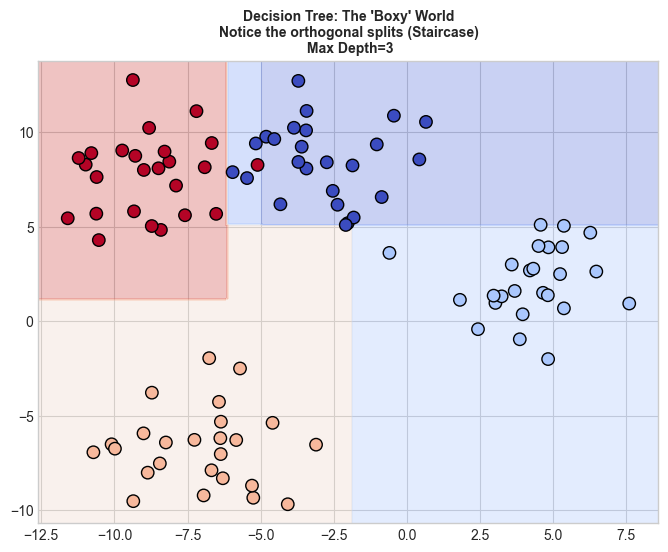

In [32]:
# CELL 7: DECISION TREE BOUNDARY
from sklearn.tree import DecisionTreeRegressor

# Generate Data
X, y = make_blobs(n_samples=100, centers=4, random_state=42, cluster_std=2.0)

# Fit Model
tree_clf = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_clf.fit(X, y)

# Plot
plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 200),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 200))
Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=80)
plt.title("Decision Tree: The 'Boxy' World\nNotice the orthogonal splits (Staircase)\n Max Depth=3", fontsize=10, fontweight='bold')
plt.show()

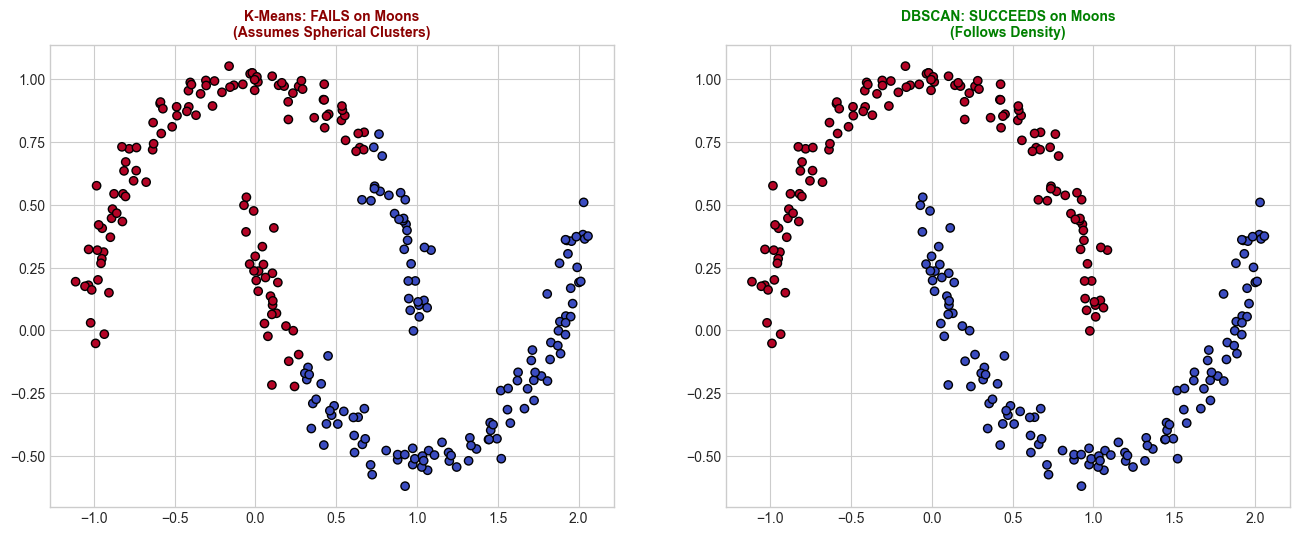

In [33]:
# CELL 8: CLUSTERING FAIL (K-Means vs DBSCAN)
from sklearn.cluster import KMeans, DBSCAN

# Generate Moon Data
X, y = make_moons(n_samples=250, noise=0.05, random_state=0)

# Fit Models
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=42).fit(X)
dbscan = DBSCAN(eps=0.3, min_samples=5).fit(X)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='coolwarm', edgecolors='k')
axes[0].set_title("K-Means: FAILS on Moons\n(Assumes Spherical Clusters)", fontsize=10, color='darkred', fontweight='bold')

axes[1].scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='coolwarm', edgecolors='k')
axes[1].set_title("DBSCAN: SUCCEEDS on Moons\n(Follows Density)", fontsize=10, color='green', fontweight='bold')

plt.show()

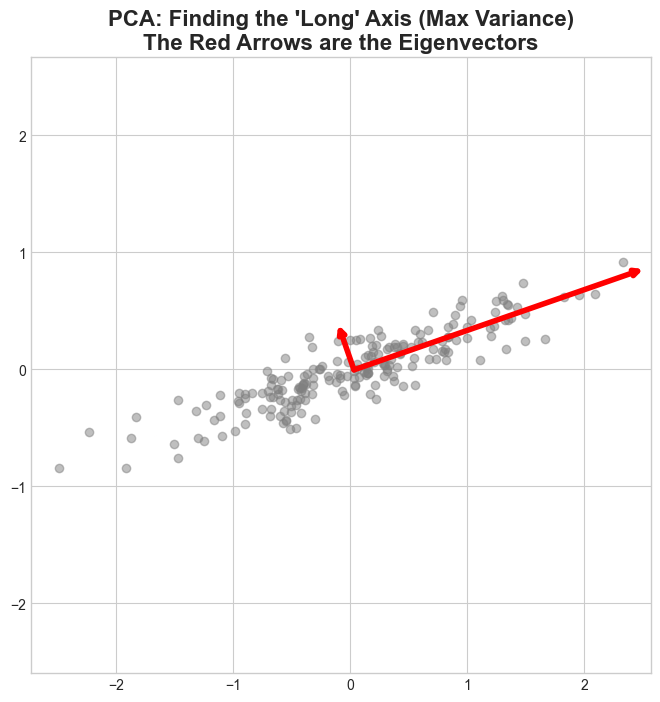

In [11]:
# CELL 9: PCA EIGENVECTORS
from sklearn.decomposition import PCA

# Generate stretched blob data
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

# Fit PCA
pca = PCA(n_components=2)
pca.fit(X)

# Plot
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, color='gray')

# Draw Eigenvectors
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=4, shrinkA=0, shrinkB=0, color='red')
    ax.annotate('', xy=v1, xytext=v0, arrowprops=arrowprops)

# Mean of data
mean = pca.mean_
# Plot each component
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length) # Scale for visibility
    draw_vector(mean, mean + v)

plt.axis('equal')
plt.title("PCA: Finding the 'Long' Axis (Max Variance)\nThe Red Arrows are the Eigenvectors", fontsize=16, fontweight='bold')
plt.show()

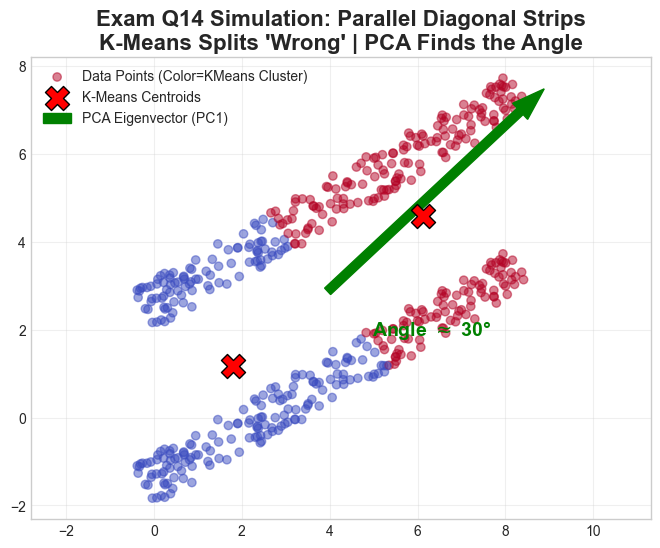

In [25]:
# CELL 10: EXAM SIMULATION (Parallel Strips)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Generate Data: Two Parallel Lines
np.random.seed(42)
# Create a long strip
n_points = 250
X_strip = np.random.rand(n_points, 2) * [10, 1]
# Rotate it by 30 degrees
theta = np.radians(30)
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])
X_rotated = X_strip @ rotation_matrix.T

# Create two parallel strips by shifting
X1 = X_rotated + [0, 2] # Shift up
X2 = X_rotated - [0, 2] # Shift down
X = np.vstack([X1, X2])

# 2. Run K-Means (k=2)
kmeans = KMeans(n_clusters=2, n_init=1, random_state=42)
kmeans.fit(X)
centroids = kmeans.cluster_centers_

# 3. Run PCA
pca = PCA(n_components=1)
pca.fit(X)
eigenvector = pca.components_[0]
mean = pca.mean_

# 4. Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='coolwarm', alpha=0.5, label='Data Points (Color=KMeans Cluster)')

# Plot K-Means Centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=300, color='red', edgecolor='black', zorder=10, label='K-Means Centroids')

# Plot PCA Eigenvector
scale = 6
plt.arrow(mean[0], mean[1], eigenvector[0]*scale, eigenvector[1]*scale,
          color='green', width=0.2, head_width=0.5, label='PCA Eigenvector (PC1)')

# Add visualization of the angle
plt.text(mean[0]+1, mean[1]-1, "Angle $\\approx$ 30°", color='green', fontsize=14, fontweight='bold')

plt.title("Exam Q14 Simulation: Parallel Diagonal Strips\nK-Means Splits 'Wrong' | PCA Finds the Angle", fontsize=16, fontweight='bold')
plt.legend()
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.show()

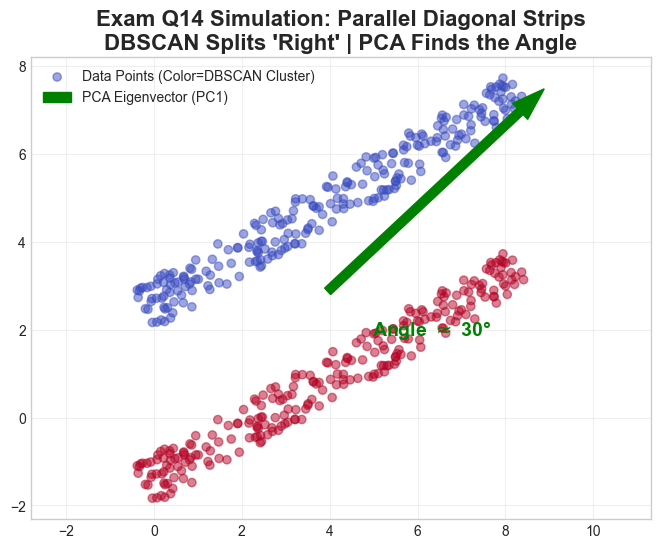

In [13]:
# compare with DBScan

# CELL 10: EXAM SIMULATION (Parallel Strips)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Generate Data: Two Parallel Lines
np.random.seed(42)
# Create a long strip
n_points = 250
X_strip = np.random.rand(n_points, 2) * [10, 1]
# Rotate it by 30 degrees
theta = np.radians(30)
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])
X_rotated = X_strip @ rotation_matrix.T

# Create two parallel strips by shifting
X1 = X_rotated + [0, 2] # Shift up
X2 = X_rotated - [0, 2] # Shift down
X = np.vstack([X1, X2])

# 2. Run K-Means (k=2)
dbscan = DBSCAN().fit(X)
dbscan.fit(X)
# centroids = dbscan.cluster_centers_

# 3. Run PCA
pca = PCA(n_components=1)
pca.fit(X)
eigenvector = pca.components_[0]
mean = pca.mean_

# 4. Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='coolwarm', alpha=0.5, label='Data Points (Color=DBSCAN Cluster)')

# Plot PCA Eigenvector
scale = 6
plt.arrow(mean[0], mean[1], eigenvector[0] * scale, eigenvector[1] * scale,
          color='green', width=0.2, head_width=0.5, label='PCA Eigenvector (PC1)')

# Add visualization of the angle
plt.text(mean[0]+1, mean[1]-1, "Angle $\\approx$ 30°", color='green', fontsize=14, fontweight='bold')

plt.title("Exam Q14 Simulation: Parallel Diagonal Strips\nDBSCAN Splits 'Right' | PCA Finds the Angle", fontsize=16, fontweight='bold')
plt.legend()
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.show()

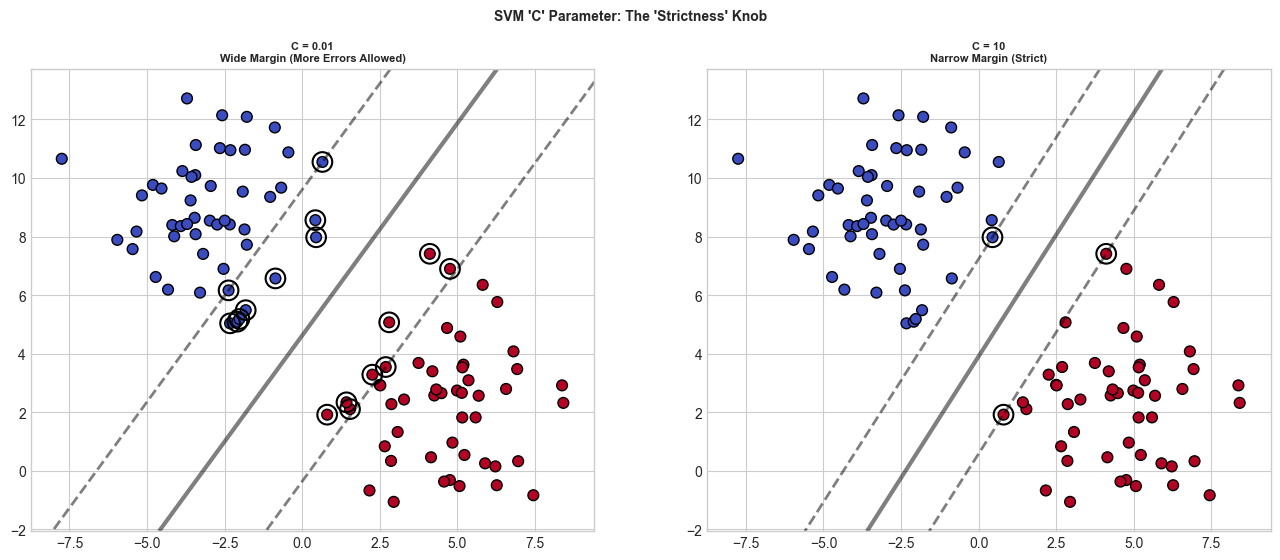

In [14]:
# CELL 11: SVM C PARAMETER (Margin Hardness)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# Generate data with some overlap
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=2.0)

# C values to compare
c_values = [0.01, 10]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for ax, c_val in zip(axes, c_values):
    # Fit Linear SVM
    clf = SVC(kernel='linear', C=c_val)
    clf.fit(X, y)

    # Create grid to plot
    xx = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    yy = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
    XX, YY = np.meshgrid(xx, yy)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plot data
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=60)

    # Plot decision boundary and margins
    # Levels: -1 (margin), 0 (boundary), 1 (margin)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'], linewidths=[2, 3, 2])

    # Highlight Support Vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200,
               linewidth=1.5, facecolors='none', edgecolors='k', label='Support Vectors')

    title = f"C = {c_val}\nWide Margin (More Errors Allowed)" if c_val < 1 else f"C = {c_val}\nNarrow Margin (Strict)"
    ax.set_title(title, fontsize=8, fontweight='bold')

plt.suptitle("SVM 'C' Parameter: The 'Strictness' Knob", fontsize=10, fontweight='bold')
plt.show()

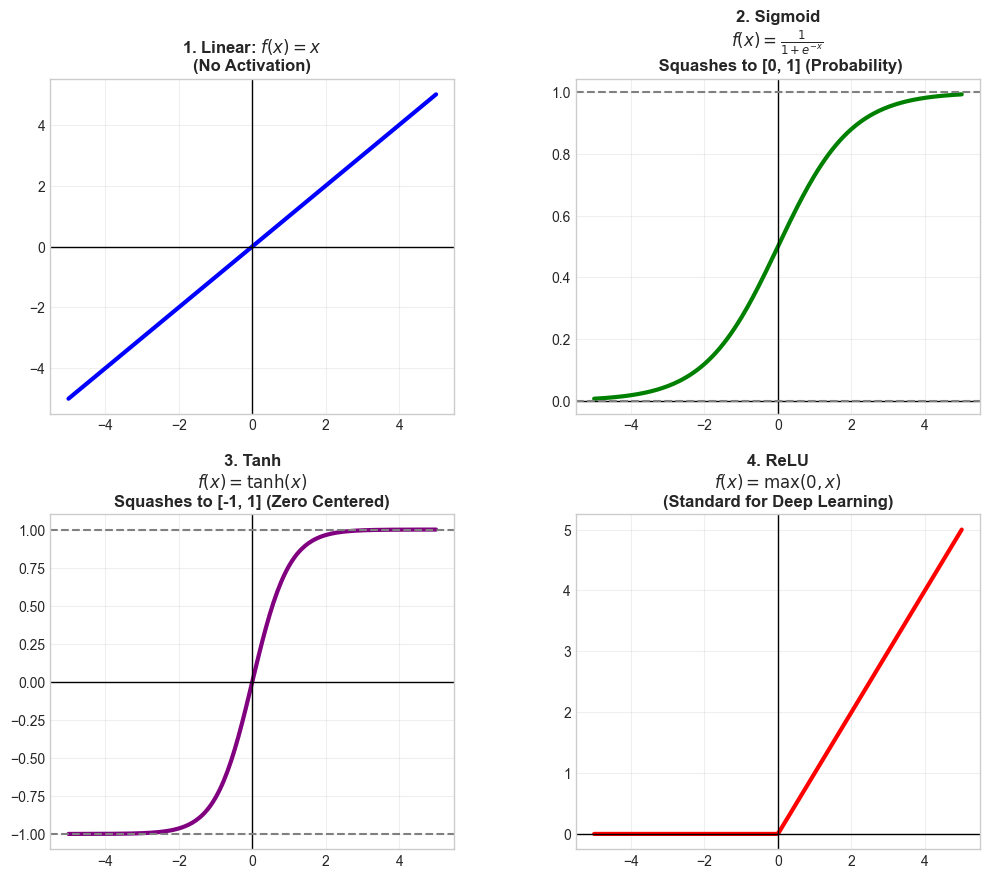

In [20]:
# graph sigmoid# CELL 12: ACTIVATION FUNCTIONS
import numpy as np
import matplotlib.pyplot as plt

# Define range
x = np.linspace(-5, 5, 200)

# Define functions
y_sigmoid = 1 / (1 + np.exp(-x))
y_tanh = np.tanh(x)
y_relu = np.maximum(0, x)
y_linear = x

# Setup plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Plot 1: Linear
axes[0, 0].plot(x, y_linear, color='blue', linewidth=3)
axes[0, 0].set_title("1. Linear: $f(x)=x$\n(No Activation)", fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axhline(0, color='black', linewidth=1)
axes[0, 0].axvline(0, color='black', linewidth=1)

# Plot 2: Sigmoid
axes[0, 1].plot(x, y_sigmoid, color='green', linewidth=3)
axes[0, 1].set_title("2. Sigmoid\n$f(x)=\\frac{1}{1+e^{-x}}$ \n Squashes to [0, 1] (Probability)", fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axhline(0, color='black', linewidth=1)
axes[0, 1].axvline(0, color='black', linewidth=1)
axes[0, 1].axhline(1, color='gray', linestyle='--')
axes[0, 1].axhline(0, color='gray', linestyle='--')

# Plot 3: Tanh
axes[1, 0].plot(x, y_tanh, color='purple', linewidth=3)
axes[1, 0].set_title("3. Tanh\n$f(x)=\\tanh(x)$\nSquashes to [-1, 1] (Zero Centered)", fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(0, color='black', linewidth=1)
axes[1, 0].axvline(0, color='black', linewidth=1)
axes[1, 0].axhline(1, color='gray', linestyle='--')
axes[1, 0].axhline(-1, color='gray', linestyle='--')

# Plot 4: ReLU
axes[1, 1].plot(x, y_relu, color='red', linewidth=3)
axes[1, 1].set_title("4. ReLU\n$f(x)=\\max(0,x)$\n(Standard for Deep Learning)", fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(0, color='black', linewidth=1)
axes[1, 1].axvline(0, color='black', linewidth=1)

plt.show()

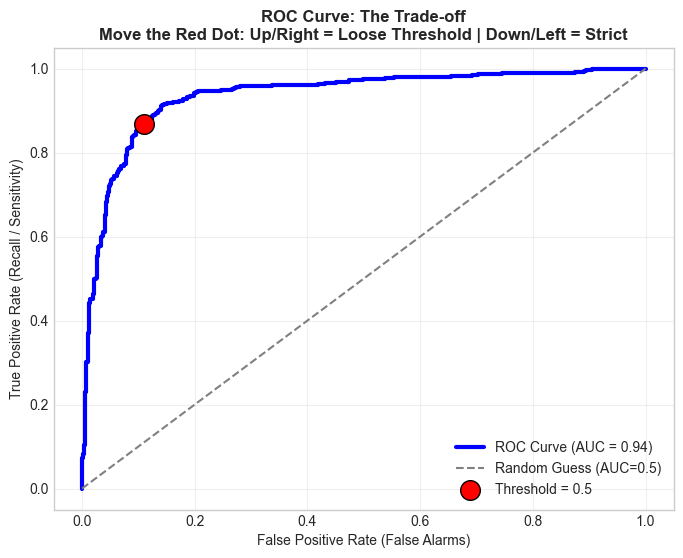

In [16]:
# CELL 12: ROC CURVE & THRESHOLD
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Generate Data
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)

# 2. Train Model
model = LogisticRegression()
model.fit(X, y)
# Get probabilities for the positive class (Class 1)
y_probs = model.predict_proba(X)[:, 1]

# 3. Calculate ROC Metrics
fpr, tpr, thresholds = roc_curve(y, y_probs)
auc_score = roc_auc_score(y, y_probs)

# 4. Find the point on the curve closest to a specific threshold (e.g., 0.5)
target_thresh = 0.5
closest_idx = np.argmin(np.abs(thresholds - target_thresh))
thresh_fpr = fpr[closest_idx]
thresh_tpr = tpr[closest_idx]

# 5. Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', linewidth=3, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess (AUC=0.5)')

# Highlight the threshold
plt.scatter(thresh_fpr, thresh_tpr, s=200, color='red', edgecolor='black', zorder=10, label=f'Threshold = {target_thresh}')

plt.title('ROC Curve: The Trade-off\nMove the Red Dot: Up/Right = Loose Threshold | Down/Left = Strict', fontsize=12, fontweight='bold')
plt.xlabel('False Positive Rate (False Alarms)')
plt.ylabel('True Positive Rate (Recall / Sensitivity)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

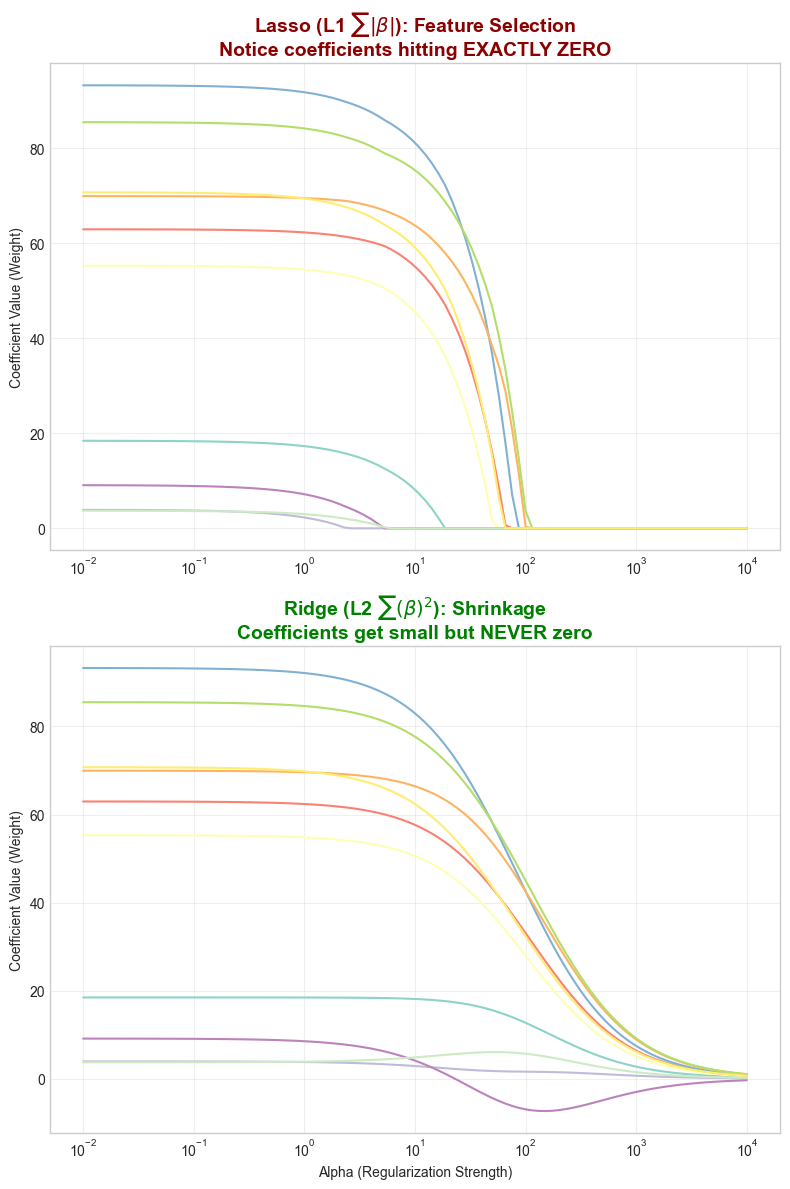

In [17]:
# CELL 13: LASSO (L1) vs RIDGE (L2) PATHS
from sklearn.linear_model import Lasso, Ridge
from sklearn.datasets import make_regression

# 1. Generate Data
X, y = make_regression(n_samples=100, n_features=10, noise=10, random_state=42)

# 2. Define Alphas (Strength of penalty)
alphas = np.logspace(-2, 4, 100)

lasso_coefs = []
ridge_coefs = []

# 3. Train models for every alpha
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X, y)
    lasso_coefs.append(lasso.coef_)

    ridge = Ridge(alpha=a)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)

# 4. Plot
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

# Lasso Plot
axes[0].plot(alphas, lasso_coefs)
axes[0].set_xscale('log')
axes[0].set_title('Lasso (L1 $\\sum{\\vert \\beta \\vert}$): Feature Selection\nNotice coefficients hitting EXACTLY ZERO', fontsize=14, color='darkred', fontweight='bold')
axes[0].set_ylabel('Coefficient Value (Weight)')
axes[0].grid(True, alpha=0.3)

# Ridge Plot
axes[1].plot(alphas, ridge_coefs)
axes[1].set_xscale('log')
axes[1].set_title('Ridge (L2 $\\sum{(\\beta)^2}$): Shrinkage\nCoefficients get small but NEVER zero', fontsize=14, color='green', fontweight='bold')
axes[1].set_xlabel('Alpha (Regularization Strength)')
axes[1].set_ylabel('Coefficient Value (Weight)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()